<a href="https://colab.research.google.com/github/FNAVA123/SleepDetection/blob/main/SDCEye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [ ]:
#Descarga el data set de https://www.kaggle.com/datasets/tauilabdelilah/mrl-eye-dataset/data
import kagglehub
import os
ruta = kagglehub.dataset_download("tauilabdelilah/mrl-eye-dataset")
print("Path to dataset files:", ruta)
archivos = os.listdir(ruta)
ruta = os.path.join(ruta, archivos[0])
archivos = os.listdir(ruta)
train = os.path.join(ruta, archivos[0])
val  =os.path.join(ruta, archivos[1])
print(archivos)

100%|██████████| 330M/330M [00:03<00:00, 111MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tauilabdelilah/mrl-eye-dataset/versions/6
['test', 'train']


In [ ]:
height = 114
width  = 114
batchSize = 32
trainSize = 0.1
#Crea instancia para los datos de entrenamiento y los pasa a un solo canal
dataSet = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=(height, width),
    batch_size=batchSize,
    color_mode='grayscale'
)

valSet = tf.keras.utils.image_dataset_from_directory(
    val,
    image_size=(height, width),
    batch_size=batchSize,
    color_mode='grayscale'
)
print(dataSet.class_names)


Found 3223 files belonging to 2 classes.
Found 81675 files belonging to 2 classes.
['close eyes', 'open eyes']


In [ ]:
#Establecer el modelo
model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(height, width, 1)))

# Capas convolucionales y pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#Red neuronal
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Regularización
model.add(layers.Dense(2, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 114, 114, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 54, 54, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       5,120,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,212,866 (19.89 MB)

 Trainable params: 5,212,866 (19.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001 )

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(valSet, epochs=3 , validation_data=dataSet , batch_size=batchSize)

Epoch 1/3
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 48s 17ms/step - accuracy: 0.8647 - loss: 0.3158 - val_accuracy: 0.8954 - val_loss: 0.2653
Epoch 2/3
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 76s 16ms/step - accuracy: 0.9511 - loss: 0.1376 - val_accuracy: 0.8582 - val_loss: 0.3697
Epoch 3/3
2553/2553 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9631 - loss: 0.1062 - val_accuracy: 0.9321 - val_loss: 0.1765


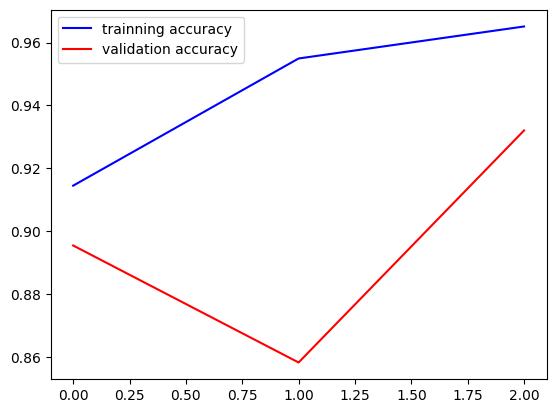

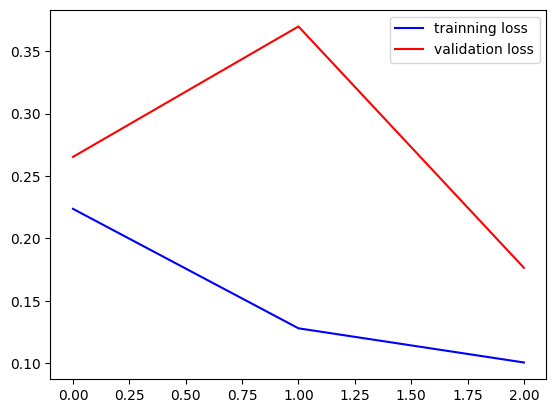

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [ ]:

model.save('eyesDetectBetter.keras')


In [ ]:
from keras.models import load_model
modelo = load_model('eyesDetectBetter.keras')

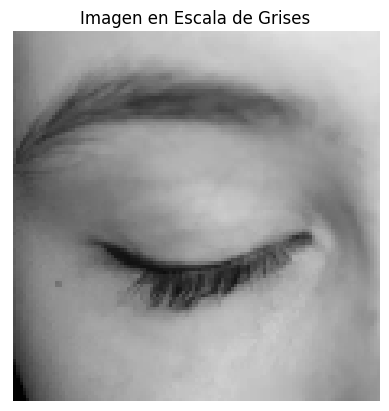

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicción: Cerrados
Probabilidades: ['0.9999', '0.0001']


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Cargar la imagen
img_path = '/content/t.png'
img = image.load_img(img_path, target_size=(height, width))  # Ajustar el tamaño de la imagen

# Convertir a array
img_array = image.img_to_array(img)

# Convertir a escala de grises
img_array = tf.image.rgb_to_grayscale(img_array).numpy()

# Expande las dimensiones para que sea compatible con el modelo (batch size)
img_array = np.expand_dims(img_array, axis=0)

# Mostrar la imagen preprocesada
plt.imshow(img_array[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.title('Imagen en Escala de Grises')
plt.show()

prediccion = modelo.predict(img_array)

labels = ["Cerrados", "Abiertos"]

print(f"Predicción: {labels[prediccion.argmax()]}")
print(f"Probabilidades: {[f'{prob:.4f}' for prob in prediccion[0]]}")
